In [134]:
import pandas as pd

train_df = pd.read_csv('./train.csv') 
test_df = pd.read_csv('./test.csv')
build_df = pd.read_csv('./building_info.csv')

print(train_df.head())
print('\n')
print(test_df.head())
print('\n')
print(build_df.head())


   num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)  일조(hr)  \
0  1_20220601 00     1  20220601 00   18.6      NaN      0.9   42.0     NaN   
1  1_20220601 01     1  20220601 01   18.0      NaN      1.1   45.0     NaN   
2  1_20220601 02     1  20220601 02   17.7      NaN      1.5   45.0     NaN   
3  1_20220601 03     1  20220601 03   16.7      NaN      1.4   48.0     NaN   
4  1_20220601 04     1  20220601 04   18.4      NaN      2.8   43.0     NaN   

   일사(MJ/m2)  전력소비량(kWh)  
0        NaN     1085.28  
1        NaN     1047.36  
2        NaN      974.88  
3        NaN      953.76  
4        NaN      986.40  


   num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)
0  1_20220825 00     1  20220825 00   23.5      0.0      2.2     72
1  1_20220825 01     1  20220825 01   23.0      0.0      0.9     72
2  1_20220825 02     1  20220825 02   22.7      0.0      1.5     75
3  1_20220825 03     1  20220825 03   22.1      0.0      1.3     78
4  1_20220825 04     

In [135]:
print(train_df.columns)
print(test_df.columns)
print(build_df.columns)

Index(['num_date_time', '건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)',
       '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)'],
      dtype='object')
Index(['num_date_time', '건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)'], dtype='object')
Index(['건물번호', '건물유형', '연면적(m2)', '냉방면적(m2)', '태양광용량(kW)', 'ESS저장용량(kWh)',
       'PCS용량(kW)'],
      dtype='object')


In [136]:
train_df.drop(columns = ['num_date_time'],inplace = True)
test_df.drop(columns = ['num_date_time'],inplace = True)

In [137]:
train_df.columns = ['build_num','datetime','temperature','rain','wind','humid','sunshine','sun_energy','electric']
test_df.columns = ['build_num','datetime','temperature','rain','wind','humid']

build_df.columns = ['build_num','type','gross_area','energy_area','sun_capa','ess_capa_','pcs_capa']

In [138]:
train_df

,build_num,datetime,temperature,rain,wind,humid,sunshine,sun_energy,electric
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


In [139]:
# Null 값 확인
train_df.isnull().sum()

build_num           0
datetime            0
temperature         0
rain           160069
wind               19
humid               9
sunshine        75182
sun_energy      87913
electric            0
dtype: int64

In [140]:
train_df.dropna(axis=0, subset= ['temperature','rain','sunshine','sun_energy','wind'], inplace=True)
train_df.reset_index(inplace = True,drop=True)
train_df

,build_num,datetime,temperature,rain,wind,humid,sunshine,sun_energy,electric
0,1,20220605 08,22.9,0.0,1.3,55.0,0.0,0.25,1440.48
1,1,20220605 09,23.6,0.0,1.2,53.0,0.0,0.51,1814.40
2,1,20220605 20,20.9,0.0,3.2,64.0,0.0,0.02,2054.40
3,1,20220606 06,18.2,0.2,1.8,89.0,0.0,0.00,1348.32
4,1,20220606 07,17.9,0.1,1.9,89.0,0.0,0.07,1693.92
...,...,...,...,...,...,...,...,...,...
26383,97,20220817 16,27.2,0.0,1.4,90.0,0.0,0.57,1664.82
26384,97,20220817 17,27.1,0.0,2.7,93.0,0.0,0.49,1737.18
26385,97,20220817 18,27.1,0.0,3.0,93.0,0.0,0.19,1697.58
26386,97,20220820 09,30.3,0.0,1.6,78.0,0.0,0.38,1534.68


In [141]:
# Null 값 제거 확인
train_df.isnull().sum()

build_num      0
datetime       0
temperature    0
rain           0
wind           0
humid          0
sunshine       0
sun_energy     0
electric       0
dtype: int64

In [142]:
# datetime column: str -> datetime 
from datetime import datetime
date_form = [datetime.strptime(d, '%Y%m%d %H') for d in train_df['datetime']]
train_df['datetime'] = date_form
train_df


,build_num,datetime,temperature,rain,wind,humid,sunshine,sun_energy,electric
0,1,2022-06-05 08:00:00,22.9,0.0,1.3,55.0,0.0,0.25,1440.48
1,1,2022-06-05 09:00:00,23.6,0.0,1.2,53.0,0.0,0.51,1814.40
2,1,2022-06-05 20:00:00,20.9,0.0,3.2,64.0,0.0,0.02,2054.40
3,1,2022-06-06 06:00:00,18.2,0.2,1.8,89.0,0.0,0.00,1348.32
4,1,2022-06-06 07:00:00,17.9,0.1,1.9,89.0,0.0,0.07,1693.92
...,...,...,...,...,...,...,...,...,...
26383,97,2022-08-17 16:00:00,27.2,0.0,1.4,90.0,0.0,0.57,1664.82
26384,97,2022-08-17 17:00:00,27.1,0.0,2.7,93.0,0.0,0.49,1737.18
26385,97,2022-08-17 18:00:00,27.1,0.0,3.0,93.0,0.0,0.19,1697.58
26386,97,2022-08-20 09:00:00,30.3,0.0,1.6,78.0,0.0,0.38,1534.68


In [143]:
build_df

,build_num,type,gross_area,energy_area,sun_capa,ess_capa_,pcs_capa
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,93314.00,60500.00,-,-,-
96,97,호텔및리조트,55144.67,25880.00,-,-,-
97,98,호텔및리조트,53578.62,17373.75,-,-,-
98,99,호텔및리조트,53499.00,40636.00,-,-,-


In [144]:
kor_type = build_df['type'].unique()
print(kor_type)

['건물기타' '공공' '대학교' '데이터센터' '백화점및아울렛' '병원' '상용' '아파트' '연구소' '지식산업센터' '할인마트'
 '호텔및리조트']


In [145]:
build_df

,build_num,type,gross_area,energy_area,sun_capa,ess_capa_,pcs_capa
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,93314.00,60500.00,-,-,-
96,97,호텔및리조트,55144.67,25880.00,-,-,-
97,98,호텔및리조트,53578.62,17373.75,-,-,-
98,99,호텔및리조트,53499.00,40636.00,-,-,-


In [146]:
type_list = ['etc','public','university','datacenter','outlet','hospital','commerce','apt','lab','ip_center','mart','hotel']

for i in range(len(kor_type)):
    idx = build_df[build_df['type'] == kor_type[i]].index
    build_df['type'].iloc[idx] = type_list[i]
    
build_df

/tmp/ipykernel_3269956/1482109211.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  build_df['type'].iloc[idx] = type_list[i]


,build_num,type,gross_area,energy_area,sun_capa,ess_capa_,pcs_capa
0,1,etc,110634.00,39570.00,-,-,-
1,2,etc,122233.47,99000.00,-,-,-
2,3,etc,171243.00,113950.00,40,-,-
3,4,etc,74312.98,34419.62,60,-,-
4,5,etc,205884.00,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,hotel,93314.00,60500.00,-,-,-
96,97,hotel,55144.67,25880.00,-,-,-
97,98,hotel,53578.62,17373.75,-,-,-
98,99,hotel,53499.00,40636.00,-,-,-


In [158]:
build_df['sun_capa'][0]

'-'

In [161]:
tmp = build_df['sun_capa'][0]
build_df['sun_capa'].replace(tmp,0)
build_df

,build_num,type,gross_area,energy_area,sun_capa,ess_capa_,pcs_capa
0,1,etc,110634.00,39570.00,-,-,-
1,2,etc,122233.47,99000.00,-,-,-
2,3,etc,171243.00,113950.00,40,-,-
3,4,etc,74312.98,34419.62,60,-,-
4,5,etc,205884.00,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,hotel,93314.00,60500.00,-,-,-
96,97,hotel,55144.67,25880.00,-,-,-
97,98,hotel,53578.62,17373.75,-,-,-
98,99,hotel,53499.00,40636.00,-,-,-


KeyError: False

<Axes: >

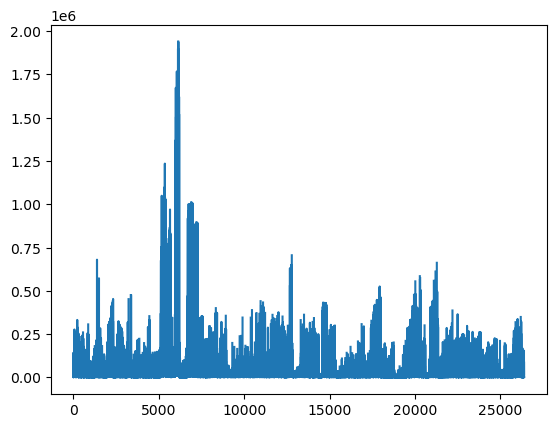

In [87]:
(train_df['electric'] / train_df['sun_energy']).plot()

datetime.datetime(2022, 4, 28, 20, 0)